In [1]:
import class_function as cf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../Data/result_iv_selected.csv')
X = data.drop(columns=['TARGET'])
Y = data.TARGET

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [4]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [5]:
y_train.value_counts()

0    226038
1     19970
Name: TARGET, dtype: int64

In [6]:
226038/19970


11.318878317476214

In [26]:
xg_cla = xgb.XGBClassifier(max_depth=10, n_estimators=500, random_state=0, colsample_bylevel = 0.2, n_jobs = 8)

#模型训练
xg_cla.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.2,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=8, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [27]:
y_proba = xg_cla.predict_proba(x_test)
y_proba

array([[0.7307185 , 0.26928154],
       [0.99256355, 0.00743647],
       [0.9278753 , 0.07212471],
       ...,
       [0.98677033, 0.01322969],
       [0.87112725, 0.12887278],
       [0.91880125, 0.08119874]], dtype=float32)

In [28]:
xg_cla.predict(x_test)[0]

0

In [29]:
import importlib
importlib.reload(cf)

threshold_list = np.arange(0, 1, 0.01)
accuracy_list = []
recall_list = []
precision_list = []
MissingAlarm_list = []
FalseAlarm_list = []
F1_list = []
fpr_list = []

for threshold in threshold_list:
    y_predicted = []
    for proba_list in y_proba:
        if proba_list[0] > threshold:
            y_predicted.append(0)
        else:
            y_predicted.append(1)
            
    fbc = cf.For_binary_classifier(y_predicted, y_test)
    accuracy_list.append(fbc.accuracy)
    recall_list.append(fbc.recall)
    precision_list.append(fbc.precision)
    MissingAlarm_list.append(fbc.MissingAlarm)
    FalseAlarm_list.append(fbc.FalseAlarm)
    F1_list.append(fbc.F1)
    fpr_list.append(fbc.fpr)
    print('*' * 40)
    

                    Real +          Real -     
   Predict +           0               0       
   Predict -         4855            56648     

准确率： 0.9210607612636782
召回率： 0.0
精准率： 0

漏警率： 1.0
虚警率： 1
F1: 0
fpr: 0.0
****************************************
                    Real +          Real -     
   Predict +           0               0       
   Predict -         4855            56648     

准确率： 0.9210607612636782
召回率： 0.0
精准率： 0

漏警率： 1.0
虚警率： 1
F1: 0
fpr: 0.0
****************************************
                    Real +          Real -     
   Predict +           0               0       
   Predict -         4855            56648     

准确率： 0.9210607612636782
召回率： 0.0
精准率： 0

漏警率： 1.0
虚警率： 1
F1: 0
fpr: 0.0
****************************************
                    Real +          Real -     
   Predict +           0               0       
   Predict -         4855            56648     

准确率： 0.9210607612636782
召回率： 0.0
精准率： 0

漏警率： 1.0
虚警率： 1
F1: 0
fpr: 0.0
*********

                    Real +          Real -     
   Predict +          24              10       
   Predict -         4831            56638     

准确率： 0.9212883924361414
召回率： 0.004943357363542739
精准率： 0.7058823529411765

漏警率： 0.9950566426364572
虚警率： 0.2941176470588235
F1: 0.009817958682757208
fpr: 0.00017652873887868945
****************************************
                    Real +          Real -     
   Predict +          27              11       
   Predict -         4828            56637     

准确率： 0.9213209111750646
召回率： 0.005561277033985582
精准率： 0.7105263157894737

漏警率： 0.9944387229660144
虚警率： 0.2894736842105263
F1: 0.01103617412630288
fpr: 0.0001941816127665584
****************************************
                    Real +          Real -     
   Predict +          30              14       
   Predict -         4825            56634     

准确率： 0.9213209111750646
召回率： 0.006179196704428424
精准率： 0.6818181818181818

漏警率： 0.9938208032955715
虚警率： 0.31818181818181823
F1: 0.012

                    Real +          Real -     
   Predict +          132             151      
   Predict -         4723            56497     

准确率： 0.9207518332439067
召回率： 0.027188465499485066
精准率： 0.4664310954063604

漏警率： 0.9728115345005149
虚警率： 0.5335689045936396
F1: 0.051381860646165824
fpr: 0.0026655839570682107
****************************************
                    Real +          Real -     
   Predict +          148             165      
   Predict -         4707            56483     

准确率： 0.9207843519828302
召回率： 0.030484037075180225
精准率： 0.4728434504792332

漏警率： 0.9695159629248198
虚警率： 0.5271565495207668
F1: 0.05727554179566563
fpr: 0.002912724191498376
****************************************
                    Real +          Real -     
   Predict +          155             182      
   Predict -         4700            56466     

准确率： 0.9206217582882136
召回率： 0.03192584963954686
精准率： 0.4599406528189911

漏警率： 0.9680741503604532
虚警率： 0.5400593471810089
F1: 0.0597072

                    Real +          Real -     
   Predict +          699            1225      
   Predict -         4156            55423     

准确率： 0.9125083329268491
召回率： 0.1439752832131823
精准率： 0.3633056133056133

漏警率： 0.8560247167868177
虚警率： 0.6366943866943867
F1: 0.2062251069479274
fpr: 0.021624770512639457
****************************************
                    Real +          Real -     
   Predict +          752            1338      
   Predict -         4103            55310     

准确率： 0.91153277075915
召回率： 0.1548918640576725
精准率： 0.3598086124401914

漏警率： 0.8451081359423275
虚警率： 0.6401913875598086
F1: 0.21655867530597553
fpr: 0.023619545261968647
****************************************
                    Real +          Real -     
   Predict +          798            1464      
   Predict -         4057            55184     

准确率： 0.9102320212022178
召回率： 0.16436663233779608
精准率： 0.35278514588859416

漏警率： 0.8356333676622039
虚警率： 0.6472148541114058
F1: 0.224251791485176

                    Real +          Real -     
   Predict +         3578            21500     
   Predict -         1277            35148     

准确率： 0.6296603417719461
召回率： 0.73697219361483
精准率： 0.1426748544541032

漏警率： 0.26302780638517
虚警率： 0.8573251455458968
F1: 0.23906725019209565
fpr: 0.37953678858918233
****************************************
                    Real +          Real -     
   Predict +         3902            26531     
   Predict -          953            30117     

准确率： 0.5531274897159488
召回率： 0.803707518022657
精准率： 0.12821608122761477

漏警率： 0.19629248197734295
虚警率： 0.8717839187723853
F1: 0.2211516662888234
fpr: 0.46834839711905096
****************************************
                    Real +          Real -     
   Predict +         4269            33553     
   Predict -          586            23095     

准确率： 0.44492138594865294
召回率： 0.8792996910401648
精准率： 0.11287081592723812

漏警率： 0.12070030895983519
虚警率： 0.8871291840727619
F1: 0.20006092274527265

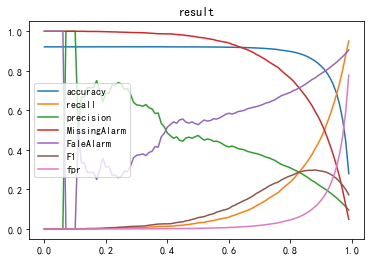

In [39]:
x_list = np.arange(0, 1, 0.01)
plt.title('result')
plt.plot(x_list, accuracy_list, label='accuracy')
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, precision_list, label='precision')
plt.plot(x_list, MissingAlarm_list, label='MissingAlarm')
plt.plot(x_list, FalseAlarm_list, label='FaleAlarm')
plt.plot(x_list, F1_list, label='F1')
plt.plot(x_list, fpr_list, label='fpr')
plt.legend()
plt.show()

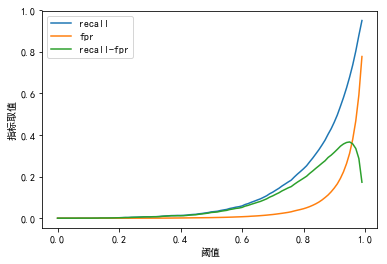

In [40]:
import matplotlib.pyplot as plt  
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(x_list, recall_list, label='recall')
plt.plot(x_list, fpr_list, label='fpr')
plt.plot(x_list, [recall_list[i] - fpr_list[i] for i in range(len(recall_list))], label='recall-fpr')
plt.legend()
plt.xlabel('阈值')
plt.ylabel('指标取值')
plt.show()

In [41]:
xg_cla.classes_

array([0, 1])

In [33]:
K_S = max([recall_list[i] - fpr_list[i] for i in range(len(recall_list))])
K_S
np.argmax([recall_list[i] - fpr_list[i] for i in range(len(recall_list))])

95

In [34]:
K_S

0.3668791289726602

In [35]:
accuracy_list[95]

0.6869258410158854

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [19.2, 10.8]
plt.rcParams['figure.dpi'] = 600
xgb.plot_tree(xg_cla,num_trees=0)
# plt.savefig('./tmp.png')
#plt.autoscale(enable=True, axis='both', tight=None)
plt.show()

plt.rcParams['figure.figsize'] = [10, 10]
xgb.plot_importance(xg_cla)
plt.show()

help(xg_cla.predict_proba)